In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 3 + 2*(x)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

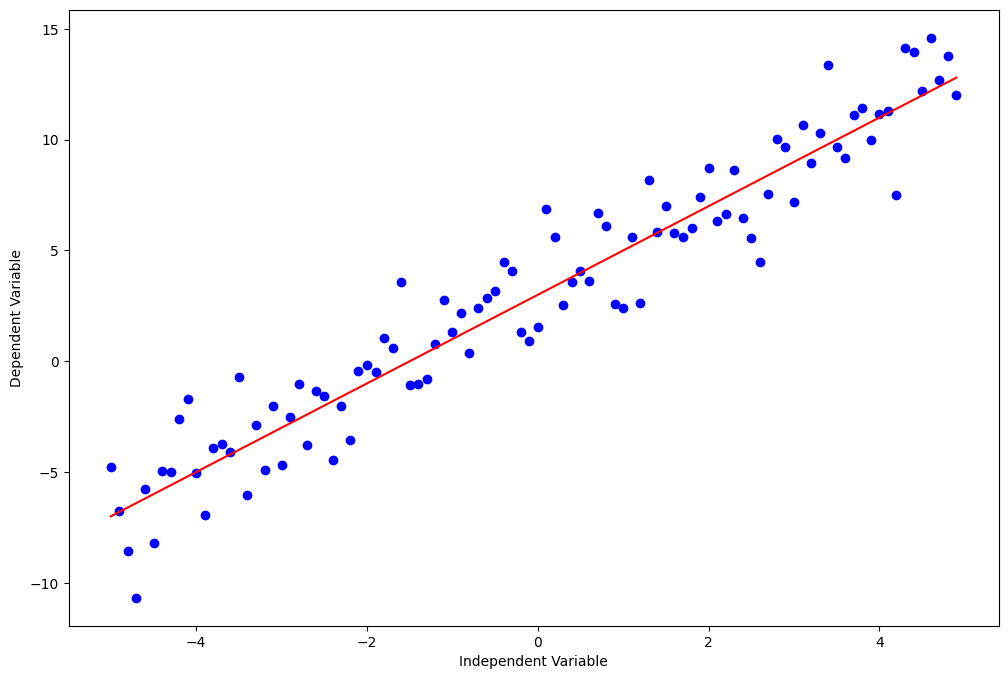

In [4]:
plt.figure(figsize=(12,8))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

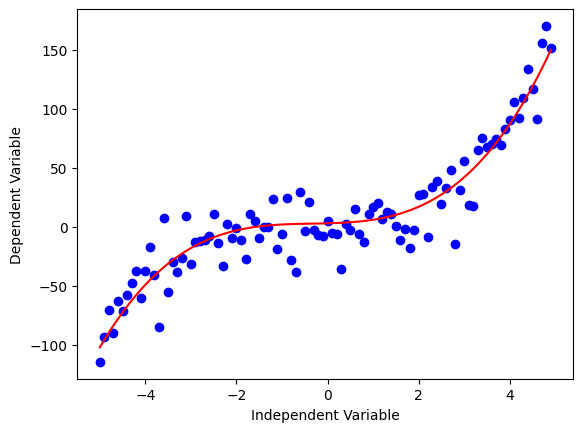

In [6]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Quadratic
y = x^2

In [7]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

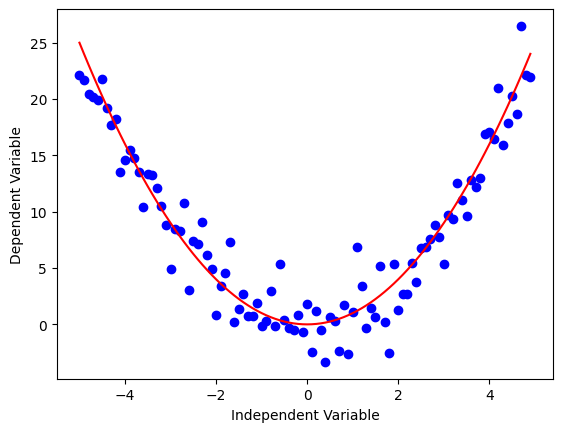

In [8]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Exponential
Y = a + b c^x

In [9]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

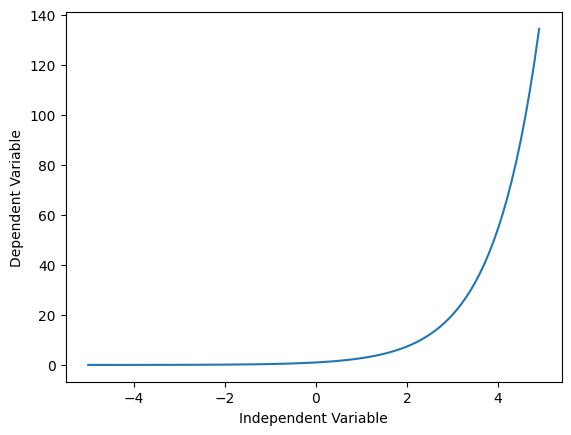

In [10]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Logarithmic
y = log(x)

Instead of x, we can use X, which can be a polynomial representation of x values.
y = log(X)

In [11]:
X = np.arange(1.0, 100.0, 0.1)

Y = np.log(X)

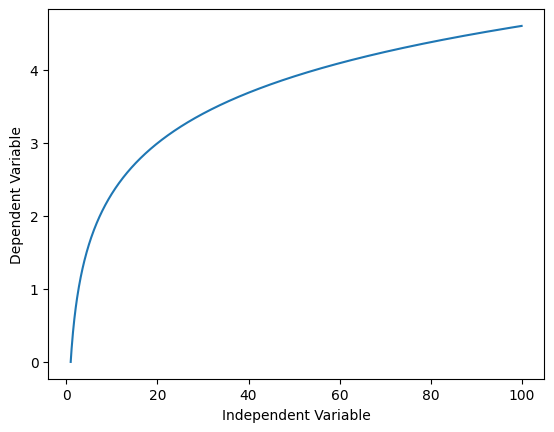

In [12]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Logistic / Sigmoid
Y = a + (b / 1 + c ^ (X-d))

In [13]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))


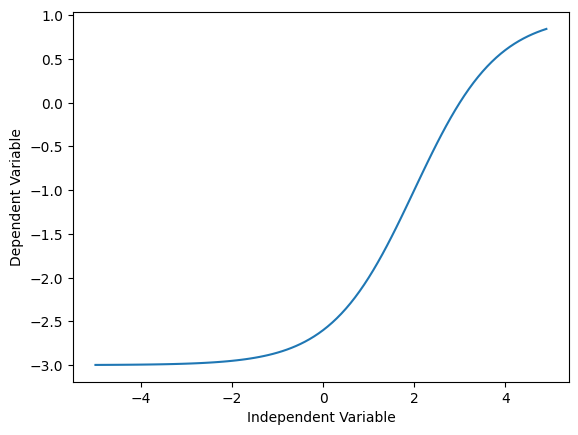

In [14]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Non-linear regression example

In [15]:
import numpy as np
import pandas as pd

In [16]:
# downloading dataset
# !wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomai

In [17]:
df = pd.read_csv("china_gdp.csv")

In [18]:
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


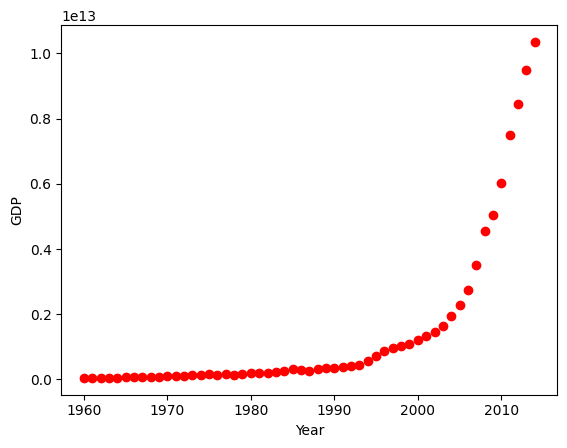

In [19]:
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, "ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

Practice
1- Choose a model for data set. Which one will be best fit?

Exponential
Sigmoid (you can use curve_fit)
2- Calculate what is the accuracy of your model.

Veriler düzenli bir artış ve azalış gösterdiği için "Exponential" modeli kurarak yapıyoruz.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("china_gdp.csv")

In [40]:
x_data = df["Year"].values.reshape(-1, 1)
y_data = df["Value"].values.reshape(-1, 1)

Üstel Modeli föormülize ettiğimizde:
Y(t) = Y0 * e^(r*t)
- Y(t) GDP değeri zaman t.
- Y0 başlangıç değeri.
- r büyüme hızı.
- t zaman.

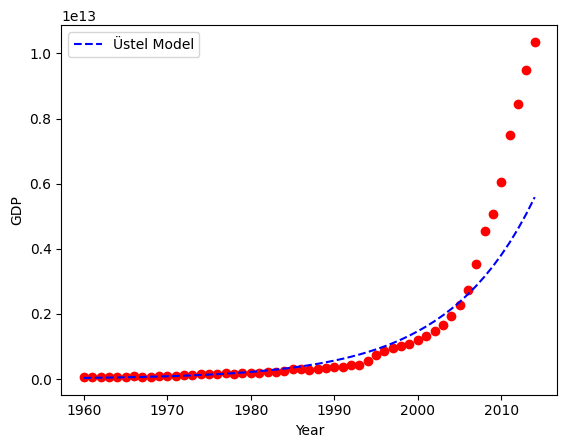

Üstel Model: Y(t) = 1.5890175131419505e-71 * e^(0.09551716761573034 * t)
Mean Squared Error (MSE): 0.09462482699466168
R^2 Score: 0.960470115735818


In [41]:
model = LinearRegression()
model.fit(x_data, np.log(y_data))  #Y değerini logaritmik olarak dönüştür

# Formüldeki r ve Y0 değerlerini tanımlıyoruz.
r = model.coef_[0][0]
Y0 = np.exp(model.intercept_[0])

# Veriyi ve uygun üstel modeli çiz
plt.scatter(df["Year"], df["Value"], color='red')
plt.plot(df["Year"], Y0 * np.exp(r * x_data), label='Üstel Model', linestyle='--', color='blue')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.show()

y_pred = Y0 * np.exp(r * x_data)
mse = mean_squared_error(np.log(y_data), np.log(y_pred))
r2 = r2_score(np.log(y_data), np.log(y_pred))
# Modelin parametrelerini ve değerlendirme metriklerini yazdır
print(f"Üstel Model: Y(t) = {Y0} * e^({r} * t)")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Sonuçlara bakıldığında exponential model veri seti için uygun gözüküyor.